<a href="https://colab.research.google.com/github/jkchandalia/nlp/blob/main/notebooks/4.0%20Generative_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Generative AI**

In [4]:
#@title **Setup**
!pip install transformers diffusers accelerate| grep -v 'already satisfied'


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 KB 18.7 MB/s eta 0:00:00


## [GPT2](https://huggingface.co/docs/transformers/model_doc/gpt2)
##### Transformer Decoder


<figure>
<center>
<p align="center">
<img src='https://drive.google.com/uc?export=view&id=1YCa3ucZmkr6vUwlLTRVIRCMcU3ReO7Oy' alt="History of LLMs", width="600" height="300"/>
</p>
<figcaption>Transformer Decoder (credit: Jay Alammar, https://jalammar.github.io/illustrated-gpt2/)</figcaption></center>
</figure>


#### *Self-supervised Learning*

*Next Word Prediction*
As a quick recap from part I, BERT built knowledge about language by learning to predict masked tokens and learning whether pairs of sentences were related. In contrast the Generative Pretrained Transformer model, aka GPT was trained by taking the beginning of a sentence and learning to predict the next word of the sentence. As with BERT, when trained over a huge amount of data, this can produce a power large language model. To see a concrete example, let’s take the first part of a sentence:

**The dog ran across the yard to get the < BLANK >**

What is next word that makes sense? What's a next work that is unlikely?


The following demo is adapted from this [blog](https://huggingface.co/blog/how-to-generate)

### *Model*

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer


tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# add the EOS token as PAD token to avoid warnings
model = GPT2LMHeadModel.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id)


### *Prompt*

In [ ]:
prompt = 'I enjoy walking with my cute dog'

### *Text Generation*

In [ ]:
# encode context the generation is conditioned on
input_ids = tokenizer.encode(prompt, return_tensors='pt')

# generate text until the output length (which includes the context length) reaches 50

sample_output = model.generate(
    input_ids,
    do_sample=True, 
    max_length=50, 
    top_k=50, 
    top_p=0.95, 
)
print("Output:\n" + 100 * '-')
print(tokenizer.decode(sample_output[0], skip_special_tokens=True))


Output:
----------------------------------------------------------------------------------------------------
I enjoy walking with my cute dog, but my wife loves to play with my sweet little dog, and as she is older we spend a lot of time together.

We love playing together because of how she has taken care of my little dog


#### What do we think of this output? Let's try the same prompt in [ChatGPT](https://chat.openai.com/chat).

### *Discussion*
What are some differences between the ChatGPT output and the GPT2 output? What are some similarities? 

***

## [Diffusion](https://huggingface.co/docs/diffusers/index)

#### https://labs.openai.com/

#### Import libraries

In [5]:
from diffusers import DiffusionPipeline
import torch
import requests
from PIL import Image
from io import BytesIO

from diffusers import StableDiffusionImg2ImgPipeline


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

### *Image Generation from Text*

In [ ]:
device = "cuda"
generator = DiffusionPipeline.from_pretrained("CompVis/ldm-text2im-large-256")
generator.to(device)

In [12]:
prompt = "An image of a squirrel in Monet style"

In [13]:


image = generator(prompt).images[0]
#image.save("image_of_squirrel_painting.png")
image

  0%|          | 0/50 [00:00<?, ?it/s]

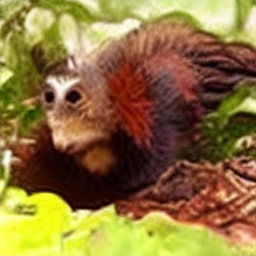

In [14]:
image

***

In [15]:

# load the pipeline

pipe = StableDiffusionImg2ImgPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16).to(
    device
)

# let's download an initial image
url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"

response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image.thumbnail((768, 768))

prompt = "A fantasy landscape, trending on artstation"

images = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5).images

images[0].save("fantasy_landscape.png")

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/usr/local/lib/python3.9/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/37 [00:00<?, ?it/s]

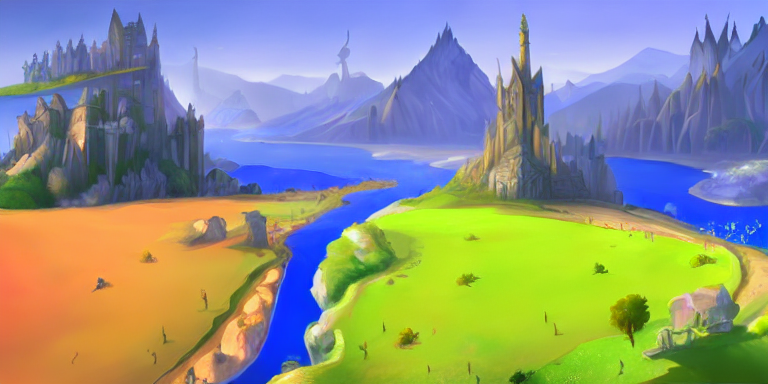

In [16]:
images[0]